# Week 4 Practical: Basic Parametric models and Statistical Learning

**Aims:**
- To gain some experience in performing regression with linear and polynomial models and classification with parametric models.
- To produce some assessable work for this subject.

---

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

---

## Linear and Polynomial Regression

---

**Question 1.A**

Plot the function $f(x) = x^{3} + 1$ over the domain $[-1,1]$. This is the "true" function for our regression problem. However, the data that we observe (i.e what we train the model with) will have Gaussian noise added to the output target values.

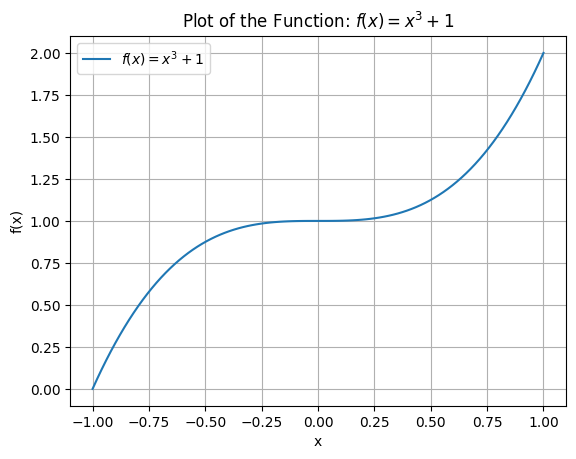

In [2]:
def f(x):
    return x**3 + 1

x_values = np.linspace(-1, 1, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$')
plt.title('Plot of the Function: $f(x) = x^3 + 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**Question 1.B**

Create a "sample training set" of 30 points by generating a random set of x/input values, and then corresponding outputs by evaluating the true function at each input value and adding Gaussian random noise. Plot the data on the same axes as the function.

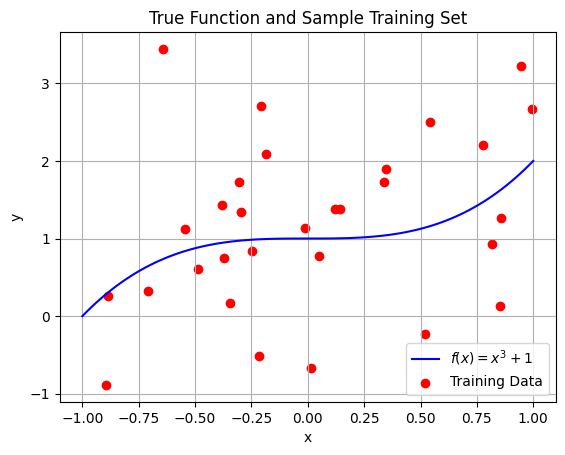

In [3]:
# TODO: Generate 30 random x values in the specified domain
np.random.seed(50)  # for reproducibility
sample_training_x = np.random.uniform(-1, 1, 30)

# TODO: Calculate corresponding y values using the true function and add Gaussian noise
noise = np.random.normal(size=sample_training_x.shape)
sample_training_y = f(sample_training_x) + noise

# Plot the true function
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$', color='blue')

# Plot the noisy data points
plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')

# Add labels and legend
plt.title('True Function and Sample Training Set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Question 1.C**

Perform linear regression using your training set and calculate the training set (sum of squares) error.

In [4]:
X_train = sample_training_x.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X_train, sample_training_y)
y_pred = lin_reg.predict(X_train)

mse = mean_squared_error(sample_training_y, y_pred)
print(f'Training Set Sum of Squares Error: {mse}')


Training Set Sum of Squares Error: 1.068860902445247


**Question 1.D**

Perform polynomial regression using your training set and calculate the training set (sum of squares) error. Experiment with different order polynomials and observe the effect on the training set error.


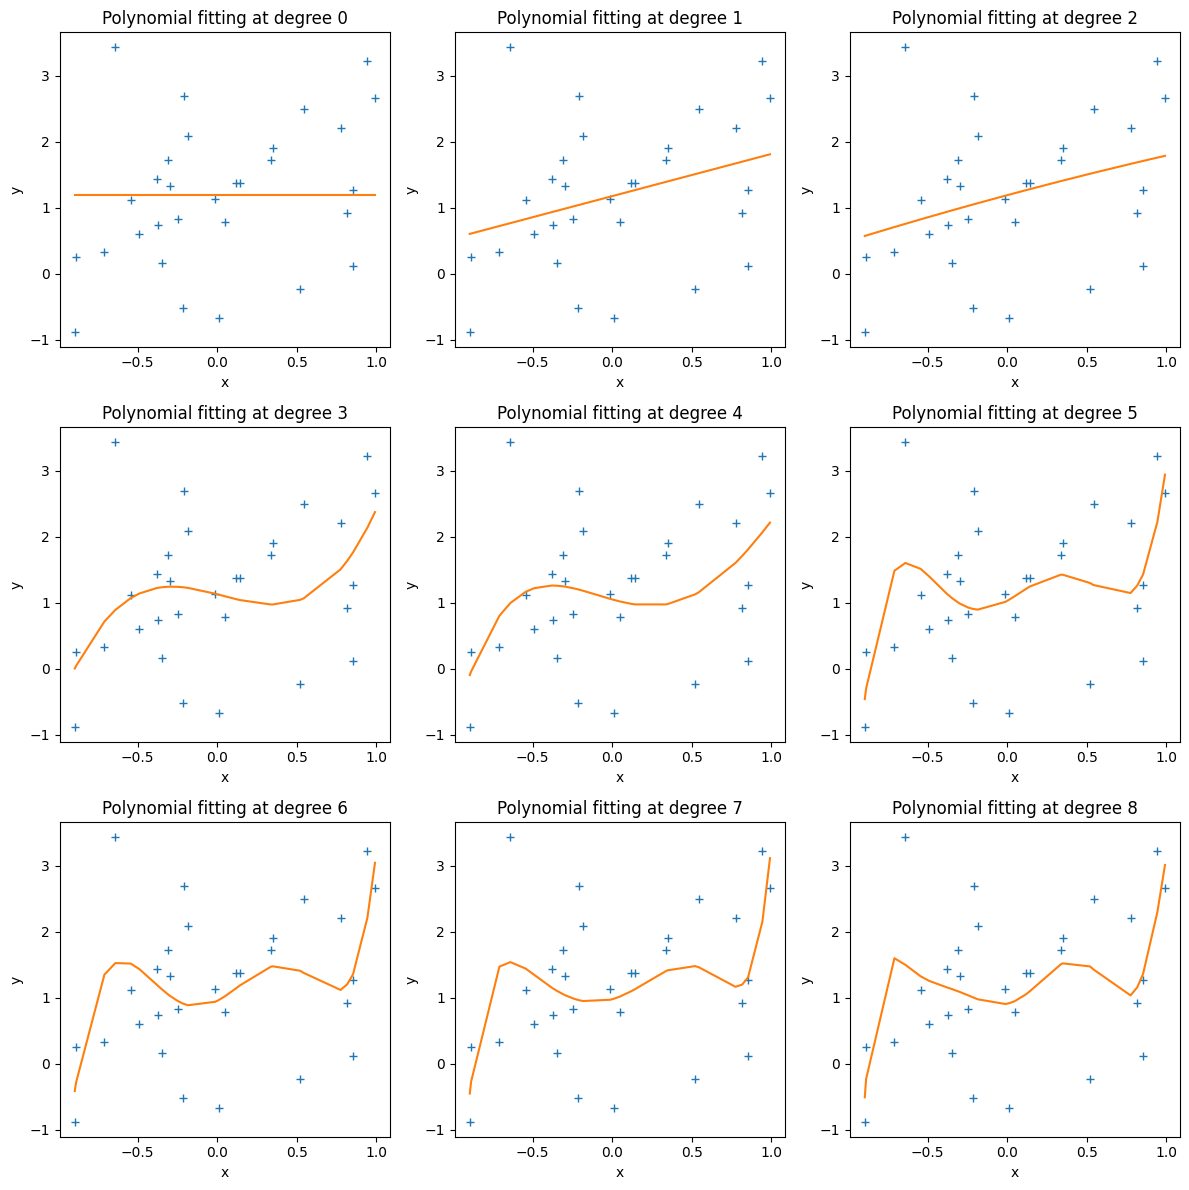

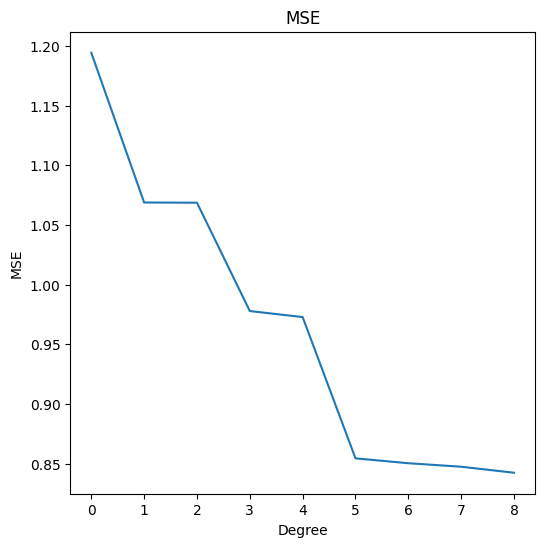

In [5]:
mses = []

plt.figure(figsize=(12, 12))

for degree in range(9):
    plt.subplot(3, 3, degree + 1)

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, sample_training_y)
    y_poly_pred = poly_reg.predict(X_poly)

    mse = mean_squared_error(sample_training_y, y_poly_pred)
    mses.append(mse)

    sorted_indices = np.argsort(sample_training_x)
    sample_training_x_sorted = sample_training_x[sorted_indices]
    pred_y_sorted = y_poly_pred[sorted_indices]

    plt.plot(sample_training_x, sample_training_y, '+')
    plt.plot(sample_training_x_sorted, pred_y_sorted)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial fitting at degree %d' % degree)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 9, 1), mses)
plt.title('MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()


---

**Question 2.A**

Download the dataset pokemonregr.csv from blackboard. This contains $7$ of the columns from the pokemon dataset. Open the file in a spreadsheet or preview the first few lines to see what it “looks like”.

In [6]:
pokemon = pd.read_csv('Datasets/pokemonregr.csv')

pokemon.head()

,attack,defense,height_m,sp_attack,sp_defense,speed,weight_kg
0,30,35,0.3,20,20,45,2.9
1,20,55,0.7,25,25,30,9.9
2,45,50,1.1,90,80,70,32.0
3,35,30,0.3,20,20,50,3.2
4,25,50,0.6,25,25,35,10.0


**Question 2.B**

Fit a linear regression model to the data, using the final column (weight in kg) as the output/target variable. 

In [7]:
pokemon = pokemon.fillna(pokemon.mean())

X, y = pokemon[pokemon.columns[:-1]], pokemon[pokemon.columns[-1]]

pokemon_reg = LinearRegression()
pokemon_reg.fit(X, y)

LinearRegression()

**Question 2.C**

What are the coefficients/parameters of your regression model?


In [8]:
pd.DataFrame(zip(X.columns, pokemon_reg.coef_), columns=['Feature', 'Coefficient'])

,Feature,Coefficient
0,attack,0.357074
1,defense,0.551564
2,height_m,53.843880
3,sp_attack,0.015288
4,sp_defense,0.158542
5,speed,-0.394064


**Question 2.D**

Recall that the coefficients can be interpreted as a weight of the importance of each weight to the predicted output. Which feature is most important for predicting weight?

**Question 2.E**

One potential issue is that the data you have used is not normalized (read the short section at the end of Sec.2.2 in the textbook. Normalise your input features and refit the linear regression model. Compare the coefficients for the resulting model to your answer from (d).


In [9]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(pokemon)
normalized_data = pd.DataFrame(normalized_data, columns=pokemon.columns)
X_normalized, y_normalized = normalized_data[normalized_data.columns[:-1]], normalized_data[normalized_data.columns[-1]]

pokemon_reg2 = LinearRegression()
pokemon_reg2.fit(X_normalized, y_normalized)

pd.DataFrame(zip(X_normalized.columns, pokemon_reg2.coef_))


,0,1
0,attack,0.064286
1,defense,0.124127
2,height_m,0.775507
3,sp_attack,0.002814
4,sp_defense,0.033300
5,speed,-0.068975


---

## Logistic Regression

---

**Note:**

implementations of logistic regression can be a part of functions that do additional things and return lots of additional information. Don’t worry about this extra stuff for now. Feel free to use ChatGPT to help you with this question!

---

**Question 3.A**

Fit a logistic regression model to the data in w3classif.csv. What are the model parameter values?

In [10]:
w3classif = pd.read_csv('Datasets/w3classif.csv', header=None)

X = w3classif.iloc[:, :-1].values  # All columns except last
y = w3classif.iloc[:, -1].values   # Last column is the class label

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg_model = LogisticRegression()
logreg_model.fit(X_scaled, y)

print("Model Coefficients:", logreg_model.coef_)
print("\nModel Intercept:",logreg_model.intercept_)

Model Coefficients: [[2.90589536 3.01711333]]

Model Intercept: [0.60005739]


**Question 3.B**

Given a test data point $x' = (1.1, 1.1)$, what does your model predict a $(y'=1|x')$?

In [11]:
x_prime = np.array([[1.1, 1.1]])
x_prime_scaled = scaler.transform(x_prime)
probability_y1 = logreg_model.predict_proba(x_prime_scaled)[:, 1]

print("Probability p(y' = 1 | x'):", probability_y1[0])

Probability p(y' = 1 | x'): 0.3275594820024205


**Question 3.C**

Plot the data with discriminant function and the decision regions for your model.

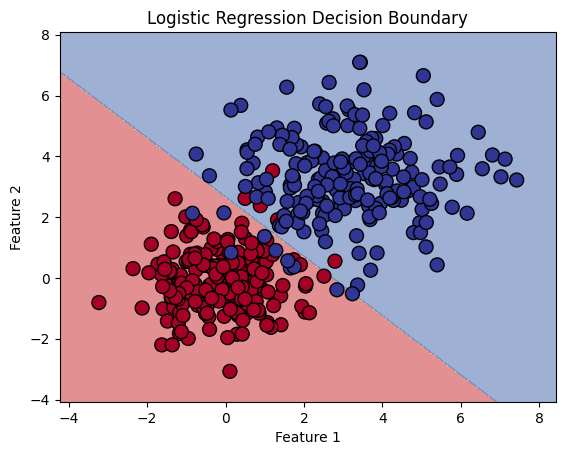

In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)

meshgrid_predictions = logreg_model.predict(meshgrid_points_scaled)

predictions = meshgrid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

plt.show()

---